<a href="https://colab.research.google.com/github/sairithwikredddy/EX_AI_LAB-_ASS/blob/main/EX_AI_AS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 0 — Requirements (run this first if you need to install on a local machine)
# On Colab you can usually skip installs. Locally:
# pip install pandas numpy matplotlib scikit-learn xgboost tensorflow shap lime

# Cell 1 — Imports & helper functions
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay  # may depend on sklearn version
import warnings
warnings.filterwarnings("ignore")

# Utility to print evaluation nicely
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [ ]:
# Cell 2 — Load dataset
data_path = "/content/drive/MyDrive/Data.csv"   # change if needed
df = pd.read_csv(data_path)
print("Shape:", df.shape)
print("Columns sample:", df.columns[:20].tolist())
display(df.head())


Shape: (43746, 80)
Columns sample: ['Description', 'Name', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy']


,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Country,Afghanistan,1850,AFG,3752993.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.436,0.629,NaN,NaN
1,Country,Afghanistan,1851,AFG,3767956.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,7.500,0.633,NaN,NaN
2,Country,Afghanistan,1852,AFG,3783940.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.560,0.637,NaN,NaN
3,Country,Afghanistan,1853,AFG,3800954.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.620,0.641,NaN,NaN
4,Country,Afghanistan,1854,AFG,3818038.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.678,0.644,NaN,NaN


Data types:
float64    76
object      3
int64       1
Name: count, dtype: int64
Top missing columns:
 share_global_other_co2               41638
share_global_cumulative_other_co2    41638
other_co2_per_capita                 41282
cumulative_other_co2                 40844
other_industry_co2                   40844
consumption_co2_per_gdp              39302
consumption_co2_per_capita           39244
trade_co2                            39211
trade_co2_share                      39211
consumption_co2                      38880
energy_per_gdp                       36050
co2_including_luc_per_unit_energy    34045
energy_per_capita                    33637
primary_energy_consumption           33595
co2_per_unit_energy                  33396
dtype: int64


,count,mean,std,min,25%,50%,75%,max
year,43746.0,1.936642e+03,5.024339e+01,1.850000e+03,1.893000e+03,1.937000e+03,1.980000e+03,2.023000e+03
population,37965.0,5.739481e+07,3.301779e+08,2.150000e+02,3.324760e+05,2.432030e+06,9.670886e+06,8.091735e+09
gdp,14989.0,3.351123e+11,3.112988e+12,4.998000e+07,7.955879e+09,2.754978e+10,1.248960e+11,1.301130e+14
cement_co2,23612.0,9.495191e+00,6.908802e+01,0.000000e+00,0.000000e+00,3.300000e-02,8.952500e-01,1.696308e+03
cement_co2_per_capita,22715.0,6.590495e-02,1.253431e-01,0.000000e+00,0.000000e+00,6.000000e-03,9.000000e-02,2.484000e+00
...,...,...,...,...,...,...,...,...
temperature_change_from_n2o,38060.0,5.089070e-04,3.042583e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.500000e-02
total_ghg,37410.0,4.885422e+02,2.392580e+03,-1.496100e+01,1.835000e+00,1.500750e+01,7.824275e+01,5.381685e+04
total_ghg_excluding_lucf,37236.0,3.161335e+02,1.839602e+03,0.000000e+00,2.350000e-01,2.371000e+00,2.933750e+01,4.411479e+04
trade_co2,4535.0,-7.232399e+00,2.506400e+02,-2.195952e+03,-3.179500e+00,1.518000e+00,9.153500e+00,1.798999e+03


CO2-like columns (candidates): ['cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2']
Using target column: co2


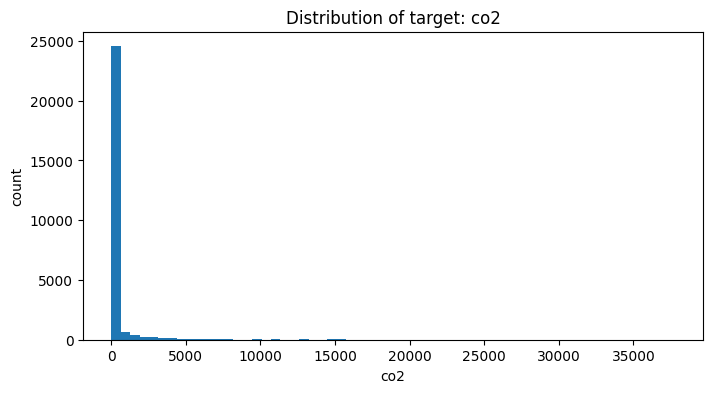

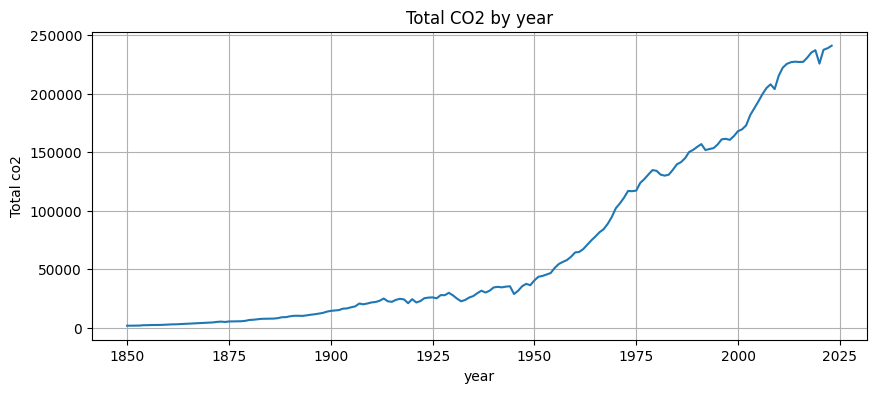

In [ ]:
# Cell 3 — Quick EDA
print("Data types:")
print(df.dtypes.value_counts())

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Top missing columns:\n", missing[missing>0].head(15))

# Numeric summary
numeric = df.select_dtypes(include=[np.number])
display(numeric.describe().T)

# Distribution plot for target candidate(s)
co2_candidates = [c for c in df.columns if 'co2' in c.lower() or 'emiss' in c.lower()]
print("CO2-like columns (candidates):", co2_candidates[:20])
# Choose target: prefer exact 'co2' or 'co2_emissions' if present, otherwise pick a sensible 'co2' column
preferred_targets = ['co2','co2_emissions','total_co2','co2_including_luc']
target_col = None
for t in preferred_targets:
    if t in df.columns:
        target_col = t
        break
if target_col is None:
    # fallback: choose first column that contains 'co2' substring
    target_col = co2_candidates[0] if co2_candidates else numeric.columns[-1]
print("Using target column:", target_col)

# Plot target distribution
plt.figure(figsize=(8,4))
plt.title(f"Distribution of target: {target_col}")
plt.hist(df[target_col].dropna(), bins=60)
plt.xlabel(target_col); plt.ylabel("count"); plt.show()

# If 'year' exists, plot total emissions by year
if 'year' in df.columns:
    yearly = df.groupby('year')[target_col].sum().reset_index()
    plt.figure(figsize=(10,4))
    plt.plot(yearly['year'], yearly[target_col])
    plt.xlabel("year"); plt.ylabel(f"Total {target_col}"); plt.title("Total CO2 by year")
    plt.grid(True); plt.show()


In [ ]:
# Cell 4 — Cleaning & preprocessing
# 1) replace inf with NaN, cap absurdly large values if present
df = df.copy()
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optional: identify columns with extremely large values and cap
numeric = df.select_dtypes(include=[np.number])
large_thresh = 1e12
for col in numeric.columns:
    if (numeric[col].abs()>large_thresh).any():
        df[col] = df[col].clip(-large_thresh, large_thresh)

# 2) drop rows with missing target
df = df[~df[target_col].isna()].copy()

# 3) identify categorical and numerical features
cat_cols = [c for c in df.columns if df[c].dtype == 'object']
num_cols = [c for c in df.columns if c not in cat_cols and c != target_col]

# 4) impute numeric and categorical
for c in num_cols:
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].mean(), inplace=True)
for c in cat_cols:
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].mode().iloc[0], inplace=True)

# 5) log-transform skewed numeric features (except target)
skewed = [c for c in num_cols if c!=target_col and abs(df[c].skew())>1.0]
for c in skewed:
    # use log1p after clipping negative values (if any)
    df[c] = np.log1p(df[c].clip(lower=0))

# 6) one-hot encode categorical features (drop_first=True)
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 7) prepare X, y and scale
features = [c for c in df.columns if c != target_col]
X = df[features].select_dtypes(include=[np.number])
y = df[target_col].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Prepared data shapes:", X_train.shape, X_test.shape)


Prepared data shapes: (21647, 76) (5412, 76)


In [ ]:
# Cell 5 — Train & evaluate classical ML models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

results = []
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        met = evaluate(y_test, preds)
        results.append({'model':name, **met})
        print(f"{name} → R2: {met['R2']:.4f}, RMSE: {met['RMSE']:.4f}")
    except Exception as e:
        print(f"{name} failed: {e}")

results_df = pd.DataFrame(results).sort_values('RMSE')
display(results_df)
# Save summary
results_df.to_csv("models_evaluation_summary.csv", index=False)
print("Saved models_evaluation_summary.csv")


LinearRegression → R2: 0.7471, RMSE: 1086.2865
Ridge → R2: 0.7472, RMSE: 1086.0181
Lasso → R2: 0.7433, RMSE: 1094.4662
DecisionTree → R2: 0.9337, RMSE: 556.3036
RandomForest → R2: 0.9362, RMSE: 545.5479
GradientBoosting → R2: 0.9403, RMSE: 527.8734
SVR → R2: 0.0032, RMSE: 2156.6172


,model,MAE,MSE,RMSE,R2
5,GradientBoosting,108.871819,2.786503e+05,527.873364,0.940279
4,RandomForest,83.998781,2.976225e+05,545.547886,0.936213
3,DecisionTree,89.876654,3.094737e+05,556.303646,0.933673
1,Ridge,437.535595,1.179435e+06,1086.018073,0.747219
0,LinearRegression,439.563564,1.180018e+06,1086.286519,0.747094
2,Lasso,425.429224,1.197856e+06,1094.466242,0.743271
6,SVR,426.047638,4.650998e+06,2156.617153,0.003182


Saved models_evaluation_summary.csv


Top 15 features by RF importance:


,0
consumption_co2,0.619466
total_ghg_excluding_lucf,0.262737
cumulative_co2,0.039195
year,0.018954
primary_energy_consumption,0.017704
oil_co2,0.008310
share_global_gas_co2,0.002934
flaring_co2,0.002739
share_global_cumulative_gas_co2,0.002346
coal_co2,0.002189


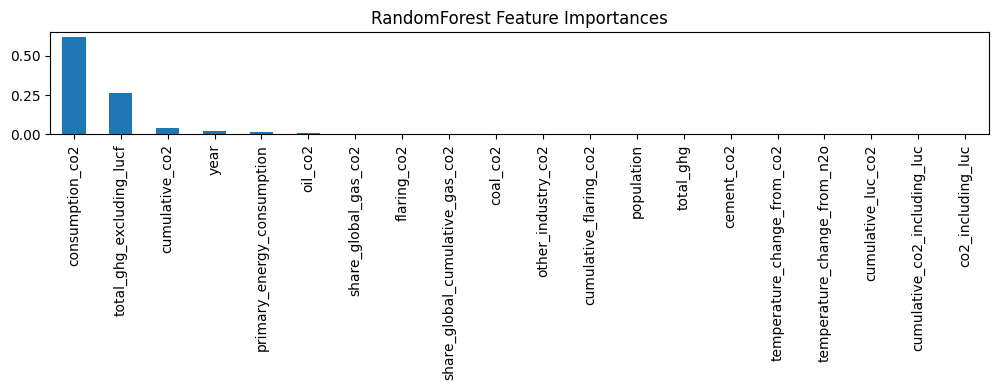

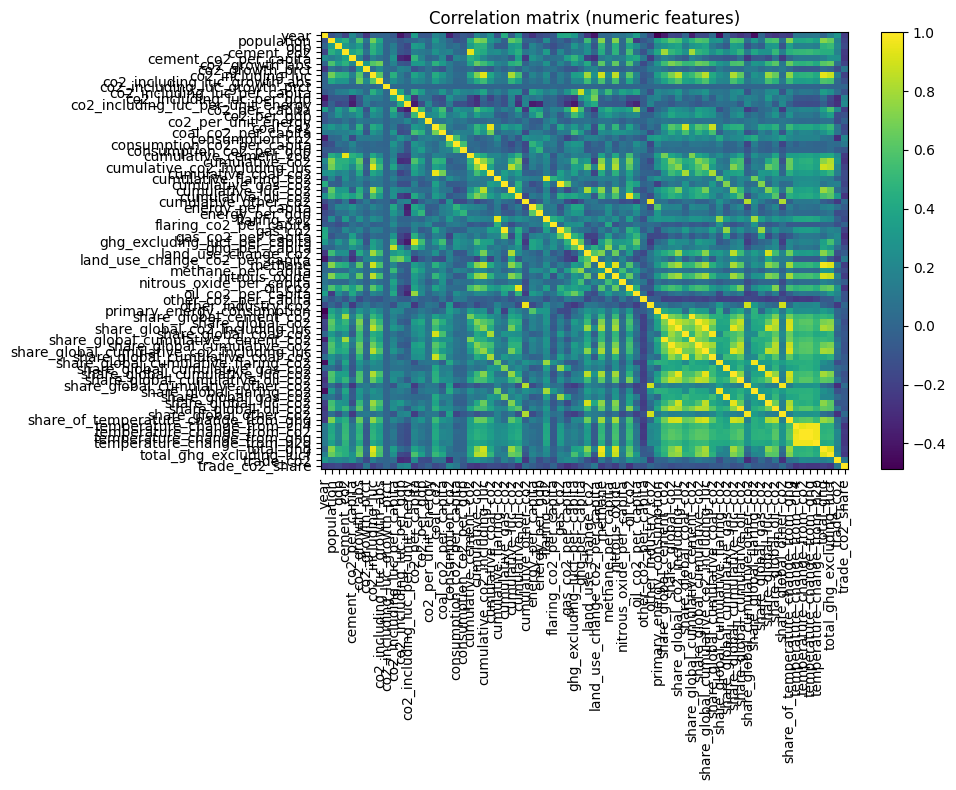

In [ ]:
# Cell 6 — Feature importance (RandomForest) & correlation heatmap
rf = models.get('RandomForest', None)
if rf is not None:
    importances = rf.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("Top 15 features by RF importance:")
    display(feat_imp.head(15))
    plt.figure(figsize=(10,4))
    feat_imp.head(20).plot(kind='bar'); plt.title("RandomForest Feature Importances"); plt.tight_layout(); plt.show()

# Correlation heatmap (numeric)
plt.figure(figsize=(10,8))
corr = X.corr()
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout(); plt.show()


Top feature: consumption_co2


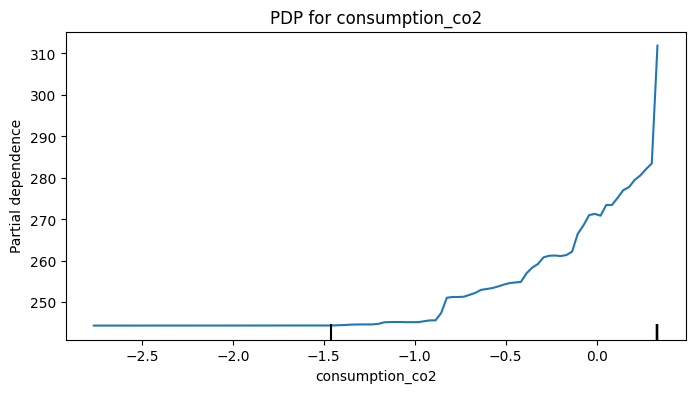

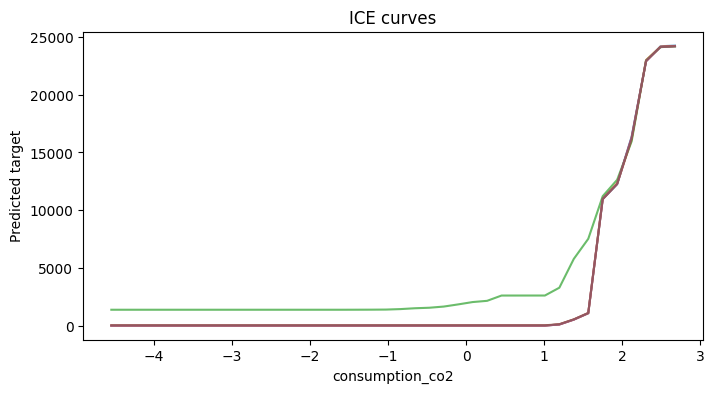

In [ ]:
# Cell 7 — Partial Dependence (PDP) and ICE for top feature
top_feature = feat_imp.index[0] if 'feat_imp' in globals() else None
if top_feature is not None:
    print("Top feature:", top_feature)
    # Convert scaled NumPy arrays back to DataFrames with original column names
    X_test_df = pd.DataFrame(X_test, columns=X.columns)

    # Define grid for both PDP fallback and ICE plots
    grid = np.linspace(X_test_df[top_feature].min(), X_test_df[top_feature].max(), 40)

    try:
        # sklearn PartialDependenceDisplay (may require sklearn>=0.24)
        fig, ax = plt.subplots(figsize=(8,4))
        PartialDependenceDisplay.from_estimator(rf, X_test_df, [top_feature], ax=ax)
        plt.title(f"PDP for {top_feature}")
        plt.show()
    except Exception as e:
        print(f"PartialDependenceDisplay failed: {e}")
        # fallback: manual PDP (vary top_feature and average predictions)
        pdp_vals = []
        for g in grid:
            X_tmp = X_test_df.copy()
            X_tmp[top_feature] = g
            pdp_vals.append(rf.predict(X_tmp.values).mean())
        plt.figure(figsize=(8,4))
        plt.plot(grid, pdp_vals); plt.xlabel(top_feature); plt.ylabel("Predicted target")
        plt.title(f"Approx PDP for {top_feature}"); plt.show()

    # ICE: plot few instance-level curves
    plt.figure(figsize=(8,4))
    for i in range(min(6, X_test.shape[0])):
        ice_vals = []
        for g in grid:
            X_tmp = X_test_df.copy()
            X_tmp[top_feature] = g
            ice_vals.append(rf.predict(X_tmp.values)[i])
        plt.plot(grid, ice_vals, alpha=0.7)
    plt.title("ICE curves"); plt.xlabel(top_feature); plt.ylabel("Predicted target"); plt.show()

TensorFlow found: 2.19.0
Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4484218.0000 - val_loss: 1705915.2500
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2225859.7500 - val_loss: 1390720.6250
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1434603.2500 - val_loss: 1155042.0000
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1233685.1250 - val_loss: 1059826.5000
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1175093.8750 - val_loss: 1015893.8750
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1191517.2500 - val_loss: 944096.1875
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1194277.7500 - val_loss: 894488.8750
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 880839.5625 - val_loss: 852950.1250
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 724644.4375 - val_loss: 817290.0000
Epoch 10/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 803566.4375 - val_loss: 7828

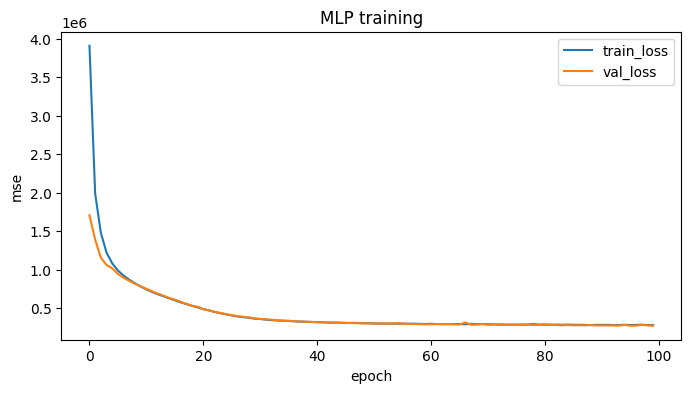

In [ ]:
# Cell 8 — Deep Learning (MLP) — optional, runs if tensorflow available
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models, callbacks
    print("TensorFlow found:", tf.__version__)
    # Build MLP per spec: Dense(128)->Dense(64)->Dense(1)
    mlp = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    mlp.compile(optimizer='adam', loss='mse')
    es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = mlp.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, callbacks=[es], verbose=1)
    # Evaluate
    preds = mlp.predict(X_test).flatten()
    met = evaluate(y_test, preds)
    print("MLP metrics:", met)
    # Plot training curve
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend(); plt.title("MLP training"); plt.xlabel("epoch"); plt.ylabel("mse"); plt.show()
except Exception as e:
    print("Skipping DL section (tensorflow unavailable or error):", e)


Top integrated gradients features for instance 0:


,0
year,567.783447
co2_including_luc_per_gdp,323.959717
ghg_per_capita,234.264313
cumulative_oil_co2,205.514664
share_global_cumulative_coal_co2,192.740448
cement_co2,169.856888
consumption_co2,160.272873
nitrous_oxide,121.484398
share_global_cumulative_gas_co2,114.278450
share_global_gas_co2,98.673012


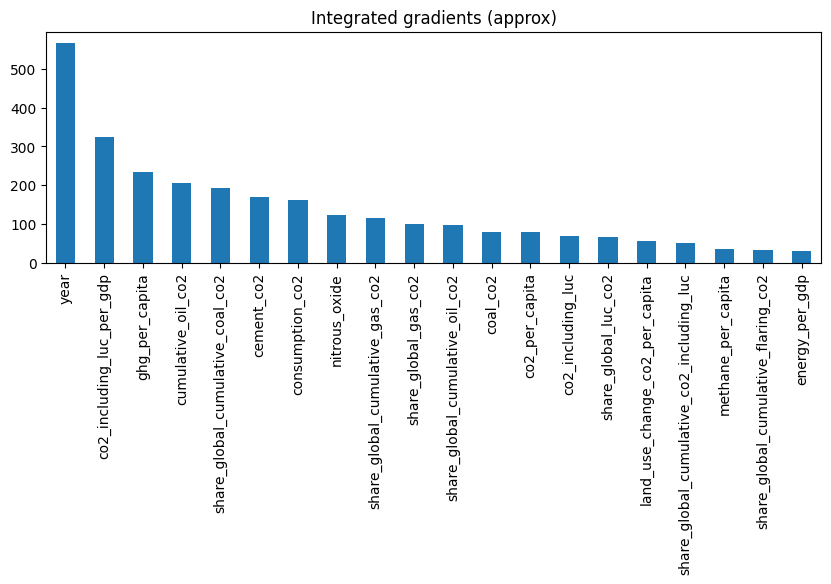

In [ ]:
# Cell 9 — Simple Integrated Gradients for the MLP (explain single instance)
# (This is a rough approximation; best to use established packages like captum / tf-explain / shap)
try:
    import tensorflow as tf
    instance = X_test[:1].astype(np.float32)
    baseline = np.zeros_like(instance)
    steps = 50
    total_grad = np.zeros_like(instance)
    alphas = np.linspace(0.0, 1.0, steps)
    for a in alphas:
        x = baseline + a*(instance - baseline)
        x_tensor = tf.convert_to_tensor(x)
        with tf.GradientTape() as tape:
            tape.watch(x_tensor)
            pred = mlp(x_tensor)
        grad = tape.gradient(pred, x_tensor).numpy()
        total_grad += grad
    integrated_grads = (instance - baseline) * total_grad.mean(axis=0)
    ig_series = pd.Series(integrated_grads.flatten(), index=X.columns).sort_values(ascending=False)
    print("Top integrated gradients features for instance 0:")
    display(ig_series.head(10))
    plt.figure(figsize=(10,3)); ig_series.head(20).plot(kind='bar'); plt.title("Integrated gradients (approx)"); plt.tight_layout(); plt.show()
except Exception as e:
    print("IG step skipped:", e)


In [ ]:
# Cell 10 — Final notes & saving artifacts
# Save model results (already saved earlier) and recommended next steps
print("Saved model evaluation to models_evaluation_summary.csv")
print("- If you need SHAP or LIME visuals, pip-install shap or lime and run shap.TreeExplainer or lime explanations.")
print("- If you want hyperparameter tuning, I recommend GridSearchCV or RandomizedSearchCV for RandomForest/GBM.")


Saved model evaluation to models_evaluation_summary.csv
- If you need SHAP or LIME visuals, pip-install shap or lime and run shap.TreeExplainer or lime explanations.
- If you want hyperparameter tuning, I recommend GridSearchCV or RandomizedSearchCV for RandomForest/GBM.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape input: (samples, features, 1)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='linear')
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_split=0.2,
                            epochs=30, batch_size=64, verbose=1)


Epoch 1/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 3545996.0000 - mae: 514.8276 - val_loss: 1581276.0000 - val_mae: 526.1362
Epoch 2/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1725683.7500 - mae: 456.3744 - val_loss: 1335470.5000 - val_mae: 401.8851
Epoch 3/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1371218.5000 - mae: 384.3590 - val_loss: 1247646.7500 - val_mae: 359.4447
Epoch 4/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1299672.1250 - mae: 354.7873 - val_loss: 1227316.6250 - val_mae: 344.6925
Epoch 5/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1431637.0000 - mae: 351.5748 - val_loss: 1157315.5000 - val_mae: 287.8489
Epoch 6/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1034732.9375 - mae: 294.6917 - val_loss: 1169884.3750 - val_mae: 321.0003
Epoch 7/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1371713.7500 - mae: 323.5957 - val_loss: 1118557.5000 - val_mae: 289.1580
Epoch 8/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - 

In [ ]:
# Reshape for LSTM: (samples, timesteps, features)
# Here, treat each feature as a timestep
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = models.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1],1)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_lstm = lstm_model.fit(X_train_lstm, y_train, validation_split=0.2,
                              epochs=30, batch_size=64, verbose=1)


Epoch 1/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 4171729.2500 - mae: 442.1704 - val_loss: 2814428.7500 - val_mae: 415.3614
Epoch 2/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - loss: 4373302.5000 - mae: 464.0442 - val_loss: 2687131.0000 - val_mae: 424.0232
Epoch 3/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 4450925.5000 - mae: 507.9826 - val_loss: 2612512.5000 - val_mae: 521.7906
Epoch 4/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 3995797.0000 - mae: 592.2696 - val_loss: 2497035.7500 - val_mae: 415.8900
Epoch 5/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 3102039.5000 - mae: 442.3821 - val_loss: 2446709.5000 - val_mae: 355.3173
Epoch 6/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 3974467.7500 - mae: 515.1381 - val_loss: 2618850.0000 - val_mae: 529.4288
Epoch 7/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 3954468.0000 - mae: 615.8114 - val_loss: 2379802.0000 - val_mae: 437.1664
Epoch 8/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms

In [ ]:
X_train_hybrid = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_hybrid  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

hybrid_model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(64),
    layers.Dense(1, activation='linear')
])

hybrid_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_hybrid = hybrid_model.fit(X_train_hybrid, y_train, validation_split=0.2,
                                  epochs=30, batch_size=64, verbose=1)


In [ ]:
input_dim = X_train.shape[1]

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(inputs)
encoded = layers.Dense(64, activation='relu')(encoded)
bottleneck = layers.Dense(32, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(bottleneck)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs, decoded)
encoder = models.Model(inputs, bottleneck)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=30, batch_size=64, validation_split=0.2, verbose=1)

# Use bottleneck features in regression head
X_train_enc = encoder.predict(X_train)
X_test_enc  = encoder.predict(X_test)

regressor = models.Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')
])
regressor.compile(optimizer='adam', loss='mse', metrics=['mae'])
regressor.fit(X_train_enc, y_train, validation_split=0.2, epochs=30, batch_size=64, verbose=1)
